# Animate Time Evolution of a Quantum System
Code references:
- __[Time Evolution: mesolve](https://qutip.org/docs/latest/guide/dynamics/dynamics-master.html)__
- __[Time Evolution: Bloch-Redfield](https://qutip.org/docs/latest/guide/dynamics/dynamics-bloch-redfield.html)__
- __[Animation](https://qutip.org/docs/latest/guide/guide-bloch.html#animating-with-the-bloch-sphere)__


In [91]:
from qutip import *
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1: Generate Time Evolution
**Instructions:** Run one of the time evolution examples, then go to Step 2

In [92]:
"""Time evolution example"""
H = 2*np.pi * 0.1 * sigmax() # Hamiltonian
psi0 = basis(2, 0) # initial state vector of the wave function
times = np.linspace(0.0, 10.0, 100)
result = mesolve(H, psi0, times, [np.sqrt(0.05) * sigmax()], [sigmaz(), sigmay(), sigmax()])
expt_list = result.expect

In [93]:
"""Time evolution example"""
def qubit_integrate(H, gamma1, gamma2, psi0, tlist):
    # operators and the hamiltonian
    sx = qutip.sigmax()
    sy = qutip.sigmay()
    sz = qutip.sigmaz()
    sm = qutip.sigmam()
    # collapse operators
    c_op_list = []
    n_th = 0.5 # temperature
    rate = gamma1 * (n_th + 1)
    if rate > 0.0: c_op_list.append(np.sqrt(rate) * sm)
    rate = gamma1 * n_th
    if rate > 0.0: c_op_list.append(np.sqrt(rate) * sm.dag())
    rate = gamma2
    if rate > 0.0: c_op_list.append(np.sqrt(rate) * sz)
    # evolve and calculate expectation values
    output = qutip.mesolve(H, psi0, tlist, c_op_list, [sx, sy, sz])
    return output.expect[0], output.expect[1], output.expect[2]

## calculate the dynamics
#w     = 1.0 * 2 * np.pi  # qubit angular frequency
#theta = 0.2 * np.pi      # qubit angle from sigma_z axis (toward sigma_x axis)
gamma1 = 0.5             # qubit relaxation rate
gamma2 = 0.2             # qubit dephasing rate
# initial state
a = 1.0

#expectation values for plotting
expt_list = qubit_integrate(H, gamma1, gamma2, psi0, times)

In [97]:
"""Time evolution example"""
def ohmic_spectrum(w):
    if w == 0.0:  # dephasing inducing noise
        return gamma1
    else:  # relaxation inducing noise
        return gamma1 / 2 * (w / (2 * np.pi)) * (w > 0.0)

delta = 0.2 * 2*np.pi
eps0 = 1.0 * 2*np.pi
gamma1 = 0.5

H = - delta / 2.0 * sigmax() - eps0 / 2.0 * sigmaz()

R, ekets = bloch_redfield_tensor(H, [[sigmax(), ohmic_spectrum]])

print(R)

tlist = np.linspace(0, 15.0, 1000)
psi0 = rand_ket(2)
e_ops = [sigmax(), sigmay(), sigmaz()]

expt_list = bloch_redfield_solve(R, ekets, psi0, tlist, e_ops)
expt_list

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = False
Qobj data =
[[ 0.        +0.j         0.        +0.j         0.        +0.j
   0.24514517+0.j       ]
 [ 0.        +0.j        -0.16103412-6.4076169j  0.        +0.j
   0.        +0.j       ]
 [ 0.        +0.j         0.        +0.j        -0.16103412+6.4076169j
   0.        +0.j       ]
 [ 0.        +0.j         0.        +0.j         0.        +0.j
  -0.24514517+0.j       ]]


[array([-8.10151358e-01, -7.62084518e-01, -7.08163562e-01, -6.48903761e-01,
        -5.84868116e-01, -5.16660799e-01, -4.44921685e-01, -3.70320137e-01,
        -2.93548778e-01, -2.15316976e-01, -1.36344172e-01, -5.73532801e-02,
         2.09361020e-02,  9.78143393e-02,  1.72588154e-01,  2.44586997e-01,
         3.13169184e-01,  3.77727672e-01,  4.37695341e-01,  4.92550251e-01,
         5.41820150e-01,  5.85086566e-01,  6.21988408e-01,  6.52225139e-01,
         6.75559134e-01,  6.91817546e-01,  7.00893780e-01,  7.02747970e-01,
         6.97407047e-01,  6.84964231e-01,  6.65577958e-01,  6.39469786e-01,
         6.06922251e-01,  5.68276118e-01,  5.23926672e-01,  4.74319820e-01,
         4.19947911e-01,  3.61345066e-01,  2.99081516e-01,  2.33758666e-01,
         1.66003332e-01,  9.64616770e-02,  2.57929958e-02, -4.53359475e-02,
        -1.16257366e-01, -1.86308977e-01, -2.54839492e-01, -3.21214780e-01,
        -3.84823817e-01, -4.45084349e-01, -5.01447339e-01, -5.53402705e-01,
        -6.0

In [95]:
"""Time evolution example"""
result = sesolve(H, psi0, times, [sigmax(), sigmaz(), sigmay(), sigmax()])
expt_list = result.expect

### Step 2: Make Animation

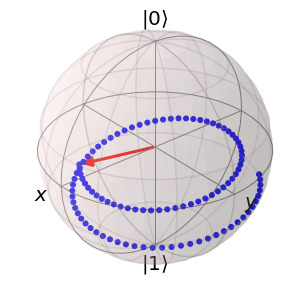

<Figure size 360x360 with 0 Axes>

In [98]:
"""Make ANIMATION"""
from matplotlib import pyplot, animation
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig, azim=-40, elev=30, auto_add_to_figure=False)
fig.add_axes(ax)
sphere = qutip.Bloch(axes=ax)

def animate(i): # generates new image each iteration
   sphere.clear()
   vector = [[expt_list[0][i], expt_list[1][i], expt_list[2][i]]] # new vector added where new point appears
   sphere.add_vectors(vector)
   sphere.add_points([expt_list[0][:i+1], expt_list[1][:i+1],
                   expt_list[2][:i+1]]) # new point added
   sphere.make_sphere()
   return ax

def init(): # keep the vector same color
   sphere.vector_color = ['r']
   return ax

ani = animation.FuncAnimation(fig, animate, blit=False, init_func=init, repeat=False) # directly animates and saves under ani variable
ani.save('bloch_sphere.mp4', fps=20)
